### CDS NYU
### DS-GA 1007 | Programming for Data Science

---

# HW 04
### Due Date: November 20, 2024, 7PM 


Firstname: Ruby

Lastname: Zhang

E-mail: qz2432@nyu.edu


--- 

Enter your solutions below,  and submit this notebook

In [1]:
import pandas as pd 
import numpy as np 

### Problem 01 (25 points)
1.1 (10 points) Create a Pandas Series object with the values given by the twelve months: "January", "February", ..., "December", and with the indexes given by the first twelve natural numbers: 1, 2, ..., 12. Then, print the slice ranging from May to September (included).

In [16]:
data = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = pd.Series(data, index=[i for i in range(1, 13)])

df[4: 9]

5          May
6         June
7         July
8       August
9    September
dtype: object

1.2 (10 points) Create a Pandas DataFrame with the indexes $0, 1, \dots, 9$ and column labels "col0", "col1", ..., "col9". Each value of the dateframe with the index $i$ and with the column "colj" should be assigned the value $50 \times i + j$. Then, print the subset of the data frame corresponding to indexes 3 to 6 (included) within the two columns "col1" and "col7".

In [19]:
indexes = [i for i in range(10)]
columns = ["col" + str(i) for i in range(10)]
data = data = [[50 * i + j for j in range(10)] for i in indexes]
df = pd.DataFrame(data,index=indexes, columns=columns)

subset = df.loc[3:6, ['col1', 'col7']]
subset

,col1,col7
3,151,157
4,201,207
5,251,257
6,301,307


1.3 (5 points) In the original data frame created in 1.2, remove all rows for which the corresponding value in the column "col7" is smaller than 150 or bigger than 300.

In [21]:
filtered_df = df[(df['col7'] >= 150) & (df['col7'] <= 300)]
filtered_df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
3,150,151,152,153,154,155,156,157,158,159
4,200,201,202,203,204,205,206,207,208,209
5,250,251,252,253,254,255,256,257,258,259


### Problem 02 (25 points)

Load the dataset "IMDB-Movie-Data.csv" into a Pandas DataFrame with the index equal to a title of a movie title, while dopping all duplicated rows, using the follwoing command:  ```df_movies = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title").drop_duplicates()```

Then:


2.1 (10 points) Print the number of rows for which the column "Metascore" is `NaN`.

In [24]:
df_movies = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title").drop_duplicates()

In [25]:
df_movies.isnull().sum()

Rank                    0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

2.2 (5 points) Print the ratio of missing value count over number of rows in the dataseet: what is the fraction of missing values for the column "Metascore".

In [30]:
print("The fraction of missing values for the column 'Metascore': ", 
  df_movies["Metascore"].isnull().sum() / len(df_movies))

The fraction of missing values for the column 'Metascore':  0.064


2.3 (5 points) Print the min, mean, max, median for the column "Metascore".

In [31]:
print("Min: ", df_movies["Metascore"].min()) 
print("Mean: ", df_movies["Metascore"].mean())
print("Max: ", df_movies["Metascore"].max())
print("Median: ", df_movies["Metascore"].median())



Min:  11.0
Mean:  58.98504273504273
Max:  100.0
Median:  59.5


2.4 (5 points) Print the median for the column "Metascore" after replacing `NaN` by the mean of this column.

In [32]:
replaced_df = df_movies["Metascore"].fillna(df_movies["Metascore"].mean())
print("Updated median: ", replaced_df.median())

Updated median:  58.98504273504273


### Problem 03 (50 points)
Load the dataset "StudentsPerformance.csv" into a Pandas DataFrame, then:

In [37]:
df = pd.read_csv("./StudentsPerformance.csv")
df

,gender,group,test preparation course,math score,reading score,writing score
0,female,group B,none,72.0,72,74.0
1,female,group C,completed,69.0,90,88.0
2,female,group B,none,NaN,95,NaN
3,male,group A,none,47.0,57,44.0
4,male,group C,none,76.0,78,75.0
...,...,...,...,...,...,...
995,female,group E,completed,88.0,99,95.0
996,male,group C,none,NaN,55,55.0
997,female,group C,completed,59.0,71,65.0
998,female,group D,completed,68.0,78,77.0


3.1 (5 points) Print the number of unique groups in this data set.  

In [41]:
print("Number of unique groups: ", len(df["group"].unique()))

Number of unique groups:  5


3.2 (10 points) For each group print the number of female and the number of male members.

In [45]:
gender_counts = df.groupby("group")["gender"].value_counts().unstack()

print("Number of female and male members in each group:")
print(gender_counts)

Number of female and male members in each group:
gender   female  male
group                
group A      36    53
group B     104    86
group C     180   139
group D     129   133
group E      69    71


3.3 (10 points) Plot the histogram over `math_score` for group A and set the number of bins to 50.

In [54]:
import matplotlib.pyplot as plt 

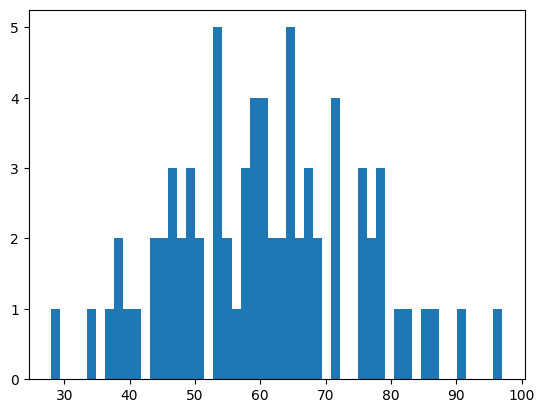

In [61]:
group_a = df[(df['group'] == "group A")]
plt.hist(group_a["math score"], bins=50)
plt.show()

3.4 (10 points) Show three `2D` scatter plots where the axes correspond to each combination of math, reading, and	writing scores. In other words, the three plots will have the following axes: 
    
Plot 1: x = "math score", y = "reading score"

Plot 2: x = "math score", y = "writing score"

Plot 3: x = "reading score", y = "writing score"

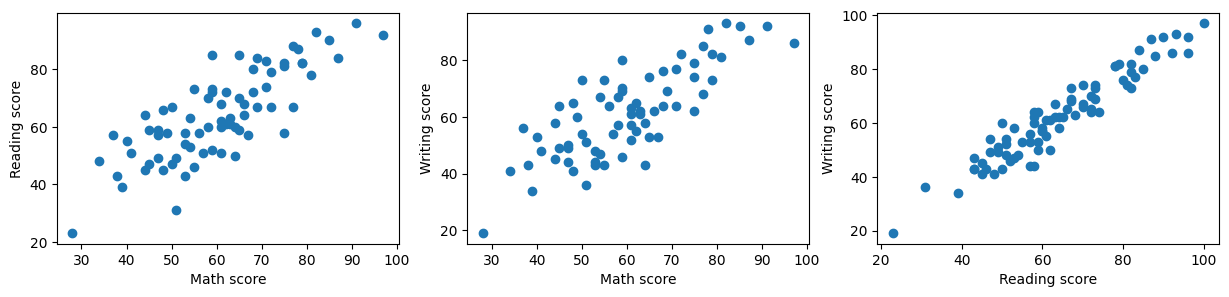

In [71]:
f, ax = plt.subplots(1,3, figsize = (15,3)) 

ax[0].scatter(group_a["math score"], group_a["reading score"])
ax[0].set_xlabel("Math score")
ax[0].set_ylabel("Reading score")
ax[1].scatter(group_a["math score"], group_a["writing score"])
ax[1].set_xlabel("Math score")
ax[1].set_ylabel("Writing score")
ax[2].scatter(group_a["reading score"], group_a["writing score"])
ax[2].set_xlabel("Reading score")
ax[2].set_ylabel("Writing score")

plt.show()

3.5 (15 points) Normalize each of the three columns `math score`, `reading score`, `writing score` by subtracting its mean value and dividing by its standard deviation, and assign the results to three new columns called `math_score_norm`, `reading_score_norm`, and `writing_score_norm`, respectively.

Perform the same task as in 3.4 (= show three `2D` scatter plots) on these newly formed columns.

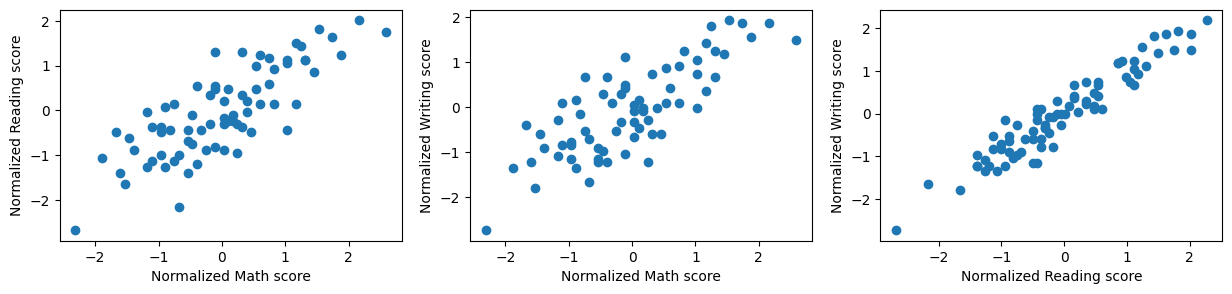

In [73]:
group_a.loc[:, 'math_score_norm'] = (group_a['math score'] - group_a['math score'].mean()) / group_a['math score'].std()
group_a.loc[:, 'reading_score_norm'] = (group_a['reading score'] - group_a['reading score'].mean()) / group_a['reading score'].std()
group_a.loc[:, 'writing_score_norm'] = (group_a['writing score'] - group_a['writing score'].mean()) / group_a['writing score'].std()

f, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].scatter(group_a['math_score_norm'], group_a['reading_score_norm'])
ax[0].set_xlabel("Normalized Math score")
ax[0].set_ylabel("Normalized Reading score")

ax[1].scatter(group_a['math_score_norm'], group_a['writing_score_norm'])
ax[1].set_xlabel("Normalized Math score")
ax[1].set_ylabel("Normalized Writing score")

ax[2].scatter(group_a['reading_score_norm'], group_a['writing_score_norm'])
ax[2].set_xlabel("Normalized Reading score")
ax[2].set_ylabel("Normalized Writing score")

plt.show()